In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [4]:
iris=datasets.load_iris()
x=pd.DataFrame(iris.data)

x.columns=['sepal_length','sepal_width','petal_length','petal_width']
y=pd.DataFrame(iris.target)
y.columns=['target']

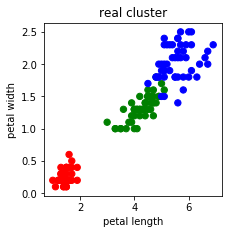

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


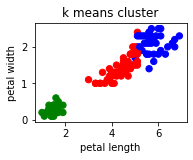

In [8]:
model=KMeans(n_clusters=3)
model.fit(x)
plt.figure(figsize=(7,7))
colormap=np.array(['red','green','blue'])
plt.subplot(2,2,1)
plt.scatter(x.petal_length,x.petal_width,c=colormap[y.target],s=40)
plt.title("real cluster")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()
plt.subplot(2,2,2)
print(model)
plt.scatter(x.petal_length,x.petal_width,c=colormap[model.labels_],s=40)
plt.title("k means cluster")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

In [9]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
scaler.fit(x)
xsa=scaler.transform(x)
xs=pd.DataFrame(xsa,columns=x.columns)
xs

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
5,-0.537178,1.939791,-1.169714,-1.052180
6,-1.506521,0.788808,-1.340227,-1.183812
7,-1.021849,0.788808,-1.283389,-1.315444
8,-1.748856,-0.362176,-1.340227,-1.315444
9,-1.143017,0.098217,-1.283389,-1.447076


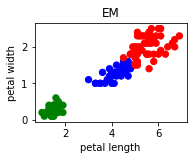

In [10]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y=gmm.predict(xs)
plt.subplot(2,2,3)
plt.scatter(x.petal_length,x.petal_width,c=colormap[gmm_y],s=40)
plt.title("EM")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()